<a href="https://colab.research.google.com/github/fzry18/Project-Akhir-Kelompok-4-MSIB-Batch-5-Greatedu-Kelompok-14-Indra-Hardiyana/blob/main/Project_Akhir_Kelompok_4_MSIB_Batch_5_Greatedu_Kelompok_14_Indra_Hardiyana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

**Tujuan:** Menciptakan sistem penanganan transportasi yang ramah lingkungan dan berkelanjutan dalam jangka panjang.

**Penelitian ini bertujuan untuk:**
- Menganalisis dampak polusi udara terhadap lingkungan sebagai bagian dari upaya pembangunan yang berkelanjutan.
- Mengkaji pengaruh peningkatan populasi manusia terhadap kebutuhan dan perilaku transportasi.
- Memahami dan mengidentifikasi hubungan antara meningkatnya kemacetan dan peningkatan emisi gas buang, yang berpotensi menurunkan kualitas udara.

**Problem Statement:**
Polusi udara di wilayah perkotaan, termasuk di beberapa kota besar di Indonesia seperti kota Medan, telah menjadi masalah serius. Udara telah tercemar oleh asap yang mengandung gas-gas berbahaya bagi kesehatan manusia. Peningkatan jumlah kendaraan bermotor dan tingginya tingkat kemacetan menjadi pemicu utama dari peningkatan emisi gas buang yang merugikan kualitas udara.

**Manfaat:**
- Memberikan dorongan bagi seluruh masyarakat untuk bersama-sama menciptakan peradaban modern yang peduli terhadap kualitas udara.
- Mengurangi emisi karbon dan pencemaran udara akibat transportasi.
- Melakukan penghijauan di lingkungan perkotaan melalui penanaman pohon di tepi jalan dan lahan kosong untuk menyerap polusi udara.
- Menyebarkan kesadaran akan pentingnya menjaga kualitas udara demi kesehatan dan lingkungan yang lebih baik.

**Tujuan Spesifik:**
- Menyediakan pemahaman yang lebih mendalam tentang dampak polusi udara terhadap kesehatan dan lingkungan.
- Mengembangkan strategi untuk mengurangi emisi gas buang dan meningkatkan kualitas udara.
- Merancang kebijakan transportasi yang lebih ramah lingkungan berdasarkan temuan analisis.

**Langkah Analisis yang Akan Dilakukan:**
1. Eksplorasi dan Pembersihan Data: Melakukan pemeriksaan awal data, penanganan nilai-nilai kosong, dan pemahaman awal tentang struktur data.
2. Analisis Exploratory Data (EDA): Visualisasi data untuk memahami hubungan antara variabel-variabel kunci yang terkait dengan polusi udara.
3. Pembuatan Model: Membangun model prediktif untuk memperkirakan tingkat emisi gas berdasarkan faktor-faktor terkait.
4. Evaluasi dan Interpretasi: Mengukur kinerja model dan menafsirkan temuan analisis untuk menyusun rekomendasi.

**Catatan:** Analisis ini diharapkan memberikan wawasan yang kuat bagi para pengambil keputusan dalam upaya untuk menciptakan lingkungan perkotaan yang lebih bersih, sehat, dan berkelanjutan.

# Data Understanding

In [ ]:
# Load data
import pandas as pd
data = pd.read_csv("Dataset Final Project.csv")
data

,kabupaten,tahun,jenis_kendaraan,jumlah_kendaraan,panjang_jalan,hasil_co2,kepadatan_jalan,penyerapan_co2
0,Medan,2019,Mobil Penumpang,20831,38,64995,3,0
1,Medan,2019,Mobil Bus,435,38,4785,3,0
2,Medan,2019,Mobil Barang,7363,38,61849,3,0
3,Medan,2019,Sepeda Motor,177495,38,432768,3,0
4,Medan,2020,Mobil Penumpang,42397,38,131398,3,0
...,...,...,...,...,...,...,...,...
155,Nias Selatan,2019,Sepeda Motor,1621,24,3242,1,0
156,Nias Selatan,2020,Mobil Penumpang,84,24,210,1,0
157,Nias Selatan,2020,Mobil Bus,2,24,22,1,0
158,Nias Selatan,2020,Mobil Barang,64,24,538,1,0


Menggunakan dataset Dataset Final Project.csv. Data berisi wilayah, transportasi (meliputi jenis dan jumlah kendaraan serta panjang dan kepadatan jalan), dan hasil emisi CO2. Dataset juga memiliki 160 baris dan 8 kolom (variabel).

# Data Preparation

In [ ]:
# Load data
import pandas as pd
data = pd.read_csv("Dataset Final Project.csv")

# One-hot encoding for jenis kendaraan
data = pd.get_dummies(data, columns=['jenis_kendaraan'])
# Encoding for kepadatan jalan
data['kepadatan_jalan'].replace({0: 'Rendah', 1: 'Sedang', 2: 'Tinggi', 3: 'Sangat Tinggi'}, inplace=True)
data = pd.get_dummies(data, columns=['kepadatan_jalan'])

data

,kabupaten,tahun,jumlah_kendaraan,panjang_jalan,hasil_co2,penyerapan_co2,jenis_kendaraan_Mobil Barang,jenis_kendaraan_Mobil Bus,jenis_kendaraan_Mobil Penumpang,jenis_kendaraan_Sepeda Motor,kepadatan_jalan_Rendah,kepadatan_jalan_Sangat Tinggi,kepadatan_jalan_Sedang,kepadatan_jalan_Tinggi
0,Medan,2019,20831,38,64995,0,0,0,1,0,0,1,0,0
1,Medan,2019,435,38,4785,0,0,1,0,0,0,1,0,0
2,Medan,2019,7363,38,61849,0,1,0,0,0,0,1,0,0
3,Medan,2019,177495,38,432768,0,0,0,0,1,0,1,0,0
4,Medan,2020,42397,38,131398,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Nias Selatan,2019,1621,24,3242,0,0,0,0,1,0,0,1,0
156,Nias Selatan,2020,84,24,210,0,0,0,1,0,0,0,1,0
157,Nias Selatan,2020,2,24,22,0,0,1,0,0,0,0,1,0
158,Nias Selatan,2020,64,24,538,0,1,0,0,0,0,0,1,0


# Data modelling

## Linear Regression

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("Dataset_Final_Project.csv")

# One-hot encoding for jenis kendaraan
data = pd.get_dummies(data, columns=['jenis_kendaraan'])

# Encoding for kepadatan jalan
data['kepadatan_jalan'].replace({0: 'Rendah', 1: 'Sedang', 2: 'Tinggi', 3: 'Sangat Tinggi'}, inplace=True)
data = pd.get_dummies(data, columns=['kepadatan_jalan'])

# Separating features and target
X = data[['jumlah_kendaraan', 'kepadatan_jalan_Rendah', 'kepadatan_jalan_Sedang', 'kepadatan_jalan_Tinggi', 'kepadatan_jalan_Sangat Tinggi', 'jenis_kendaraan_Mobil Penumpang', 'jenis_kendaraan_Mobil Bus', 'jenis_kendaraan_Mobil Barang', 'jenis_kendaraan_Sepeda Motor', 'penyerapan_co2']]
y = data['hasil_co2']

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)


## Prediksi sebelum menggunakan tanaman

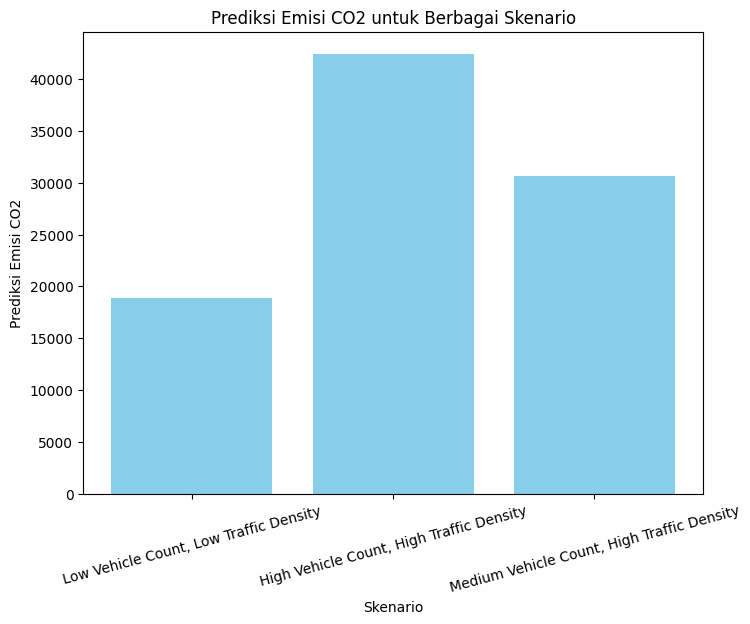

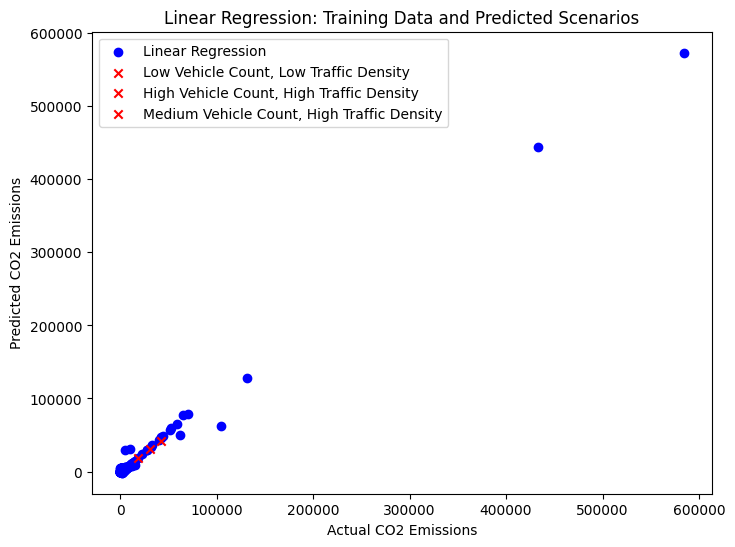

In [ ]:
scenarios = {
    'Low Vehicle Count, Low Traffic Density': {'jumlah_kendaraan': 5000, 'kepadatan_jalan': 'Rendah', 'jenis_kendaraan': 'Mobil Penumpang'},
    'High Vehicle Count, High Traffic Density': {'jumlah_kendaraan': 15000, 'kepadatan_jalan': 'Sangat Tinggi', 'jenis_kendaraan': 'Mobil Bus'},
    'Medium Vehicle Count, High Traffic Density': {'jumlah_kendaraan': 10000, 'kepadatan_jalan': 'Tinggi', 'jenis_kendaraan': 'Sepeda Motor'}
}

predictions = {}
for scenario, conditions in scenarios.items():
    data_scenario = pd.DataFrame({
        'jumlah_kendaraan': [conditions['jumlah_kendaraan']],
        'kepadatan_jalan_Rendah': 0,
        'kepadatan_jalan_Sedang': 0,
        'kepadatan_jalan_Tinggi': 0,
        'kepadatan_jalan_Sangat Tinggi': 0,
        'jenis_kendaraan_Mobil Penumpang': 0,
        'jenis_kendaraan_Mobil Bus': 0,
        'jenis_kendaraan_Mobil Barang': 0,
        'jenis_kendaraan_Sepeda Motor': 0,
        'penyerapan_co2': 0
    })

    if conditions['kepadatan_jalan'] in data_scenario.columns:
        data_scenario['kepadatan_jalan_' + conditions['kepadatan_jalan']] = 1

    if conditions['jenis_kendaraan'] in data_scenario.columns:
        data_scenario['jenis_kendaraan_' + conditions['jenis_kendaraan']] = 1

    predictions[scenario] = model.predict(data_scenario)[0]

# Visualization using bar plot for predictions
plt.figure(figsize=(10, 6))
plt.bar(predictions.keys(), predictions.values(), color='skyblue')
plt.xlabel('Scenario')
plt.ylabel('Predicted CO2 Emission (kilograms)')
plt.title('Predicted CO2 Emission for Different Scenarios')
plt.xticks(rotation=15)
plt.ylim(0, max(predictions.values()) + 5000)
for i, val in enumerate(predictions.values()):
    plt.text(i, val + 200, str(round(val, 2)), ha='center', color='black', fontweight='bold')
plt.show()

## Prediksi sesudah menggunakan tanaman

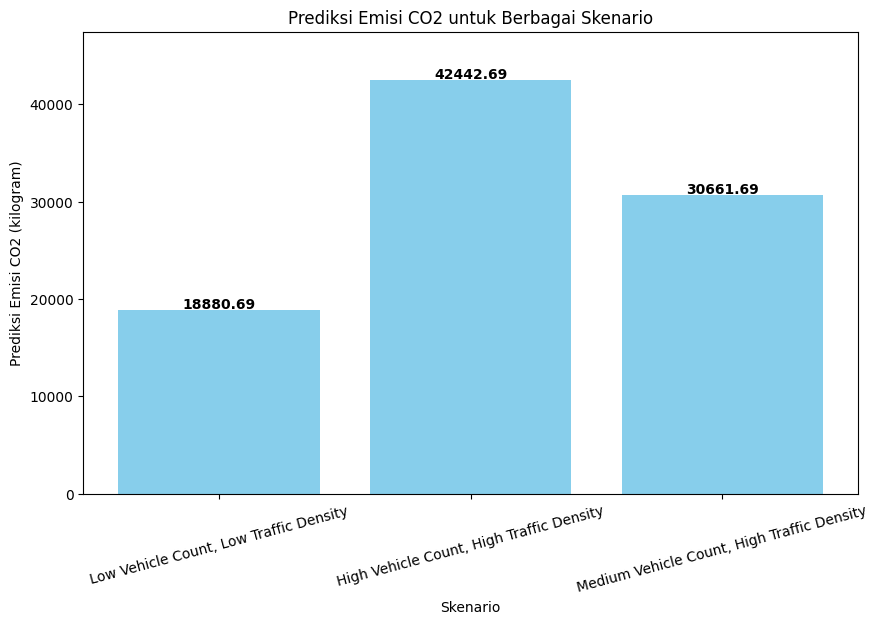

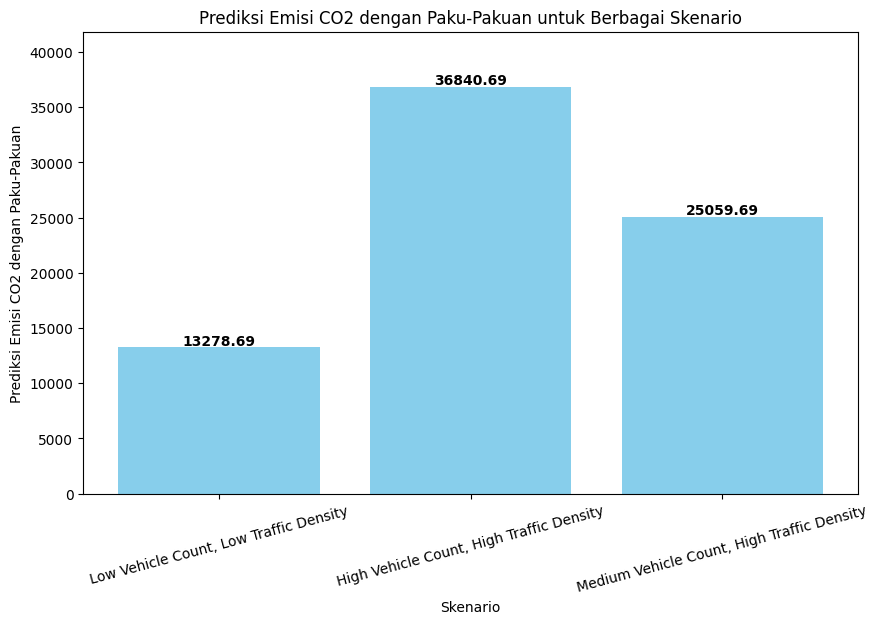

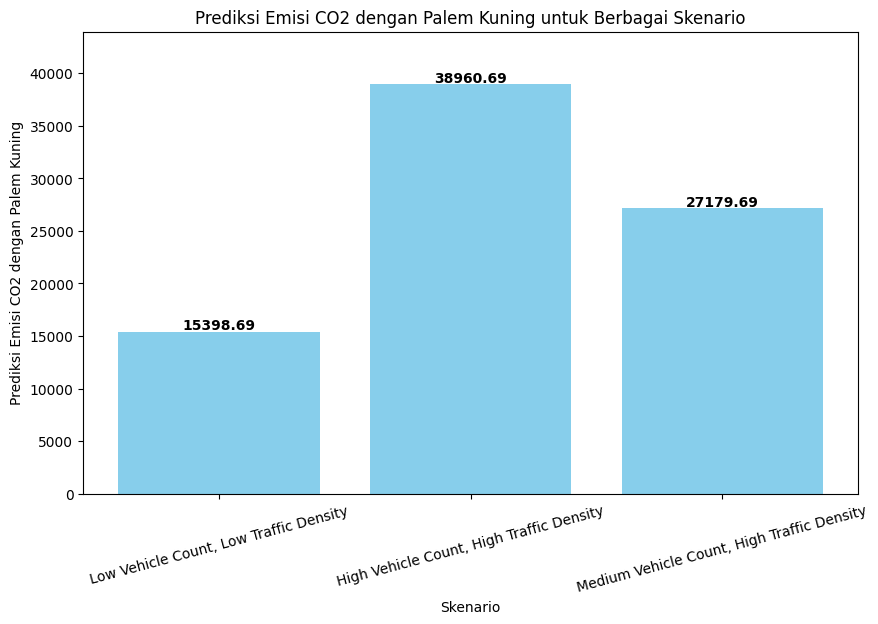

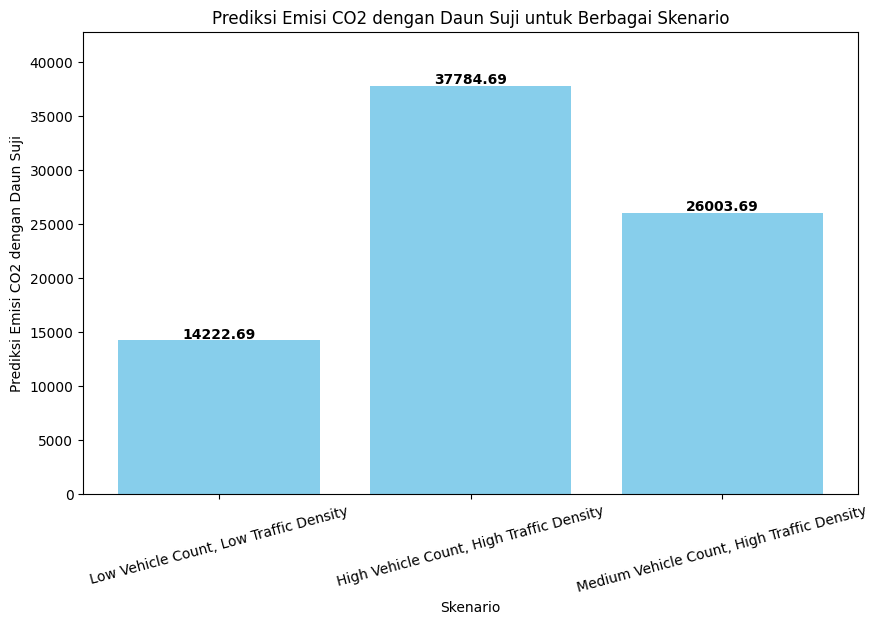

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
data = pd.read_csv("Dataset Final Project.csv")

# One-hot encoding for jenis kendaraan
data = pd.get_dummies(data, columns=['jenis_kendaraan'])
# Encoding for kepadatan jalan
data['kepadatan_jalan'].replace({0: 'Rendah', 1: 'Sedang', 2: 'Tinggi', 3: 'Sangat Tinggi'}, inplace=True)
data = pd.get_dummies(data, columns=['kepadatan_jalan'])

# Separating features and target
X = data[['jumlah_kendaraan', 'kepadatan_jalan_Rendah', 'kepadatan_jalan_Sedang', 'kepadatan_jalan_Tinggi', 'kepadatan_jalan_Sangat Tinggi', 'jenis_kendaraan_Mobil Penumpang', 'jenis_kendaraan_Mobil Bus', 'jenis_kendaraan_Mobil Barang', 'jenis_kendaraan_Sepeda Motor', 'penyerapan_co2']]
y = data['hasil_co2']

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Generating sample scenarios for prediction
scenarios = {
    'Low Vehicle Count, Low Traffic Density': {'jumlah_kendaraan': 5000, 'kepadatan_jalan': 'Rendah', 'jenis_kendaraan': 'Mobil Penumpang'},
    'High Vehicle Count, High Traffic Density': {'jumlah_kendaraan': 15000, 'kepadatan_jalan': 'Sangat Tinggi', 'jenis_kendaraan': 'Mobil Bus'},
    'Medium Vehicle Count, High Traffic Density': {'jumlah_kendaraan': 10000, 'kepadatan_jalan': 'Tinggi', 'jenis_kendaraan': 'Sepeda Motor'}
}

# Predict CO2 for different scenarios
predictions = {}
for scenario, conditions in scenarios.items():
    data_2021 = pd.DataFrame({
        'jumlah_kendaraan': [conditions['jumlah_kendaraan']],
        'kepadatan_jalan_Rendah': 0,
        'kepadatan_jalan_Sedang': 0,
        'kepadatan_jalan_Tinggi': 0,
        'kepadatan_jalan_Sangat Tinggi': 0,
        'jenis_kendaraan_Mobil Penumpang': 0,
        'jenis_kendaraan_Mobil Bus': 0,
        'jenis_kendaraan_Mobil Barang': 0,
        'jenis_kendaraan_Sepeda Motor': 0,
        'penyerapan_co2': 0  # Isi dengan nilai default jika tidak ada kolom penyerapan_co2
    })

    if conditions['kepadatan_jalan'] in data_2021.columns:
        data_2021['kepadatan_jalan_' + conditions['kepadatan_jalan']] = 1

    if conditions['jenis_kendaraan'] in data_2021.columns:
        data_2021['jenis_kendaraan_' + conditions['jenis_kendaraan']] = 1

    # Make prediction
    predictions[scenario] = model.predict(data_2021)[0]

# Visualisasi menggunakan bar plot
plt.figure(figsize=(10, 6))
plt.bar(predictions.keys(), predictions.values(), color='skyblue')
plt.xlabel('Skenario')
plt.ylabel('Prediksi Emisi CO2 (kilogram)')
plt.title('Prediksi Emisi CO2 untuk Berbagai Skenario')
plt.xticks(rotation=15)
plt.ylim(0, max(predictions.values()) + 5000)  # Membuat batas atas sesuai dengan nilai maksimum prediksi CO2
for i, val in enumerate(predictions.values()):
    plt.text(i, val + 200, str(round(val, 2)), ha='center', color='black', fontweight='bold')
plt.show()

# Data tambahan penyerapan CO2 dari tanaman
tanaman = {
    'Paku-Pakuan': 5602,
    'Palem Kuning': 3482,
    'Daun Suji': 4658
}

# Membuat data untuk setiap tanaman dan melakukan prediksi
for tnm, serapan in tanaman.items():
    scenarios_with_plant = scenarios.copy()
    for scenario in scenarios_with_plant:
        scenarios_with_plant[scenario]['penyerapan_co2'] = serapan

    predictions_with_plant = {}
    for scenario, conditions in scenarios_with_plant.items():
        data_2021_with_plant = pd.DataFrame({
            'jumlah_kendaraan': [conditions['jumlah_kendaraan']],
            'kepadatan_jalan_Rendah': 0,
            'kepadatan_jalan_Sedang': 0,
            'kepadatan_jalan_Tinggi': 0,
            'kepadatan_jalan_Sangat Tinggi': 0,
            'jenis_kendaraan_Mobil Penumpang': 0,
            'jenis_kendaraan_Mobil Bus': 0,
            'jenis_kendaraan_Mobil Barang': 0,
            'jenis_kendaraan_Sepeda Motor': 0,
            'penyerapan_co2': serapan
        })

        if conditions['kepadatan_jalan'] in data_2021_with_plant.columns:
            data_2021_with_plant['kepadatan_jalan_' + conditions['kepadatan_jalan']] = 1

        if conditions['jenis_kendaraan'] in data_2021_with_plant.columns:
            data_2021_with_plant['jenis_kendaraan_' + conditions['jenis_kendaraan']] = 1

        # Prediksi CO2 untuk skenario dengan tanaman
        predicted_co2_with_plant = model.predict(data_2021_with_plant)[0]

        # Mengurangi prediksi awal CO2 dengan penyerapan CO2 tanaman
        net_co2_reduction = serapan
        net_predicted_co2_with_plant = max(0, predicted_co2_with_plant - net_co2_reduction)

        predictions_with_plant[scenario] = net_predicted_co2_with_plant

    plt.figure(figsize=(10, 6))
    plt.bar(predictions_with_plant.keys(), predictions_with_plant.values(), color='skyblue')
    plt.xlabel('Skenario')
    plt.ylabel('Prediksi Emisi CO2 dengan ' + tnm)
    plt.title('Prediksi Emisi CO2 dengan ' + tnm + ' untuk Berbagai Skenario')
    plt.xticks(rotation=15)
    plt.ylim(0, max(predictions_with_plant.values()) + 5000)  # Membuat batas atas sesuai dengan nilai maksimum prediksi CO2 dengan tanaman
    for i, val in enumerate(predictions_with_plant.values()):
        plt.text(i, val + 200, str(round(val, 2)), ha='center', color='black', fontweight='bold')
    plt.show()


# Data evalution

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"R-squared (R²) Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


# Deployment

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the entire dataset used in data modeling
data_full = pd.read_csv("Dataset_Final_Project.csv")

# Split the data into features (X_full) and target (y_full)
X_full = data_full[['jumlah_kendaraan', 'kepadatan_jalan_Rendah', 'kepadatan_jalan_Sedang', 'kepadatan_jalan_Tinggi', 'kepadatan_jalan_Sangat Tinggi', 'jenis_kendaraan_Mobil Penumpang', 'jenis_kendaraan_Mobil Bus', 'jenis_kendaraan_Mobil Barang', 'jenis_kendaraan_Sepeda Motor', 'penyerapan_co2']]
y_full = data_full['hasil_co2']

# Load the trained model from data modeling
model = LinearRegression()
model.fit(X_full, y_full)  # Train the model using the entire dataset

# Select a subset of the data for deployment (e.g., the first 10 rows)
data_deployment = data_full.head(10)  # You can use any subset here

# Separate features for deployment
X_deployment = data_deployment[['jumlah_kendaraan', 'kepadatan_jalan_Rendah', 'kepadatan_jalan_Sedang', 'kepadatan_jalan_Tinggi', 'kepadatan_jalan_Sangat Tinggi', 'jenis_kendaraan_Mobil Penumpang', 'jenis_kendaraan_Mobil Bus', 'jenis_kendaraan_Mobil Barang', 'jenis_kendaraan_Sepeda Motor', 'penyerapan_co2']]

# Make predictions using the trained model and deployment data
predictions_deployment = model.predict(X_deployment)

# Add the predictions to the deployment dataset
data_deployment['Predicted_CO2'] = predictions_deployment

# Save the updated deployment dataset
data_deployment.to_csv("Deployment_Dataset_With_Predictions.csv", index=False)


# archive

1. Tambahkan kira-kira berapa banyak tanaman yang diperlukan ketika hasil prediksi nya udah ada
2. Buat skenario setelah adanya tanaman
3. Cari perbandingan after before nya

In [ ]:
# CO2 absorption capacity for each plant
absorption_capacity = {'Plant A': 5600, 'Plant B': 3480, 'Plant C': 4660}

# Calculate the ratio of CO2 absorption capacity to CO2 emission for each plant
ratios = {}
for plant, capacity in absorption_capacity.items():
    ratios[plant] = capacity / predictions[scenario]

# Calculate the number of plants needed for each scenario
plants_needed = {}
for scenario, emission in predictions.items():
    plants_needed[scenario] = {}
    for plant, ratio in ratios.items():
        plants_needed[scenario][plant] = round(emission * ratio)

# Print the estimated number of plants needed for each scenario
for scenario, plants in plants_needed.items():
    print(f"Scenario: {scenario}")
    for plant, count in plants.items():
        print(f"{plant}: {count}")
    print()

In [ ]:
## visualiasi nya salah

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataimport pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
data = pd.read_csv("Dataset Final Project.csv")

# One-hot encoding for jenis kendaraan
data = pd.get_dummies(data, columns=['jenis_kendaraan'])
# Encoding for kepadatan jalan
data['kepadatan_jalan'].replace({0: 'Rendah', 1: 'Sedang', 2: 'Tinggi', 3: 'Sangat Tinggi'}, inplace=True)
data = pd.get_dummies(data, columns=['kepadatan_jalan'])

# Separating features and target
X = data[['jumlah_kendaraan', 'kepadatan_jalan_Rendah', 'kepadatan_jalan_Sedang', 'kepadatan_jalan_Tinggi', 'kepadatan_jalan_Sangat Tinggi', 'jenis_kendaraan_Mobil Penumpang', 'jenis_kendaraan_Mobil Bus', 'jenis_kendaraan_Mobil Barang', 'jenis_kendaraan_Sepeda Motor', 'penyerapan_co2']]
y = data['hasil_co2']

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Generating sample scenarios for prediction
scenarios = {
    'Low Vehicle Count, Low Traffic Density': {'jumlah_kendaraan': 5000, 'kepadatan_jalan': 'Rendah', 'jenis_kendaraan': 'Mobil Penumpang'},
    'High Vehicle Count, High Traffic Density': {'jumlah_kendaraan': 15000, 'kepadatan_jalan': 'Sangat Tinggi', 'jenis_kendaraan': 'Mobil Bus'},
    'Medium Vehicle Count, High Traffic Density': {'jumlah_kendaraan': 10000, 'kepadatan_jalan': 'Tinggi', 'jenis_kendaraan': 'Sepeda Motor'}
}

# Predict CO2 for different scenarios
predictions = {}
for scenario, conditions in scenarios.items():
    data_2021 = pd.DataFrame({
        'jumlah_kendaraan': [conditions['jumlah_kendaraan']],
        'kepadatan_jalan_Rendah': 0,
        'kepadatan_jalan_Sedang': 0,
        'kepadatan_jalan_Tinggi': 0,
        'kepadatan_jalan_Sangat Tinggi': 0,
        'jenis_kendaraan_Mobil Penumpang': 0,
        'jenis_kendaraan_Mobil Bus': 0,
        'jenis_kendaraan_Mobil Barang': 0,
        'jenis_kendaraan_Sepeda Motor': 0,
        'penyerapan_co2': 0  # Isi dengan nilai default jika tidak ada kolom penyerapan_co2
    })

    if conditions['kepadatan_jalan'] in data_2021.columns:
        data_2021['kepadatan_jalan_' + conditions['kepadatan_jalan']] = 1

    if conditions['jenis_kendaraan'] in data_2021.columns:
        data_2021['jenis_kendaraan_' + conditions['jenis_kendaraan']] = 1

    # Make prediction
    predictions[scenario] = model.predict(data_2021)[0]

# Visualisasi menggunakan bar plot
plt.figure(figsize=(8, 6))
plt.bar(predictions.keys(), predictions.values(), color='skyblue')
plt.xlabel('Skenario')
plt.ylabel('Prediksi Emisi CO2')
plt.title('Prediksi Emisi CO2 untuk Berbagai Skenario')
plt.xticks(rotation=15)
plt.show()

# Data tambahan penyerapan CO2 dari tanaman
tanaman = {
    'Paku-Pakuan': 5602,
    'Palem Kuning': 3482,
    'Daun Suji': 4658
}

# Membuat data untuk setiap tanaman dan melakukan prediksi
for tnm, serapan in tanaman.items():
    scenarios_with_plant = scenarios.copy()
    for scenario in scenarios_with_plant:
        scenarios_with_plant[scenario]['penyerapan_co2'] = serapan

    predictions_with_plant = {}
    for scenario, conditions in scenarios_with_plant.items():
        data_2021_with_plant = pd.DataFrame({
            'jumlah_kendaraan': [conditions['jumlah_kendaraan']],
            'kepadatan_jalan_Rendah': 0,
            'kepadatan_jalan_Sedang': 0,
            'kepadatan_jalan_Tinggi': 0,
            'kepadatan_jalan_Sangat Tinggi': 0,
            'jenis_kendaraan_Mobil Penumpang': 0,
            'jenis_kendaraan_Mobil Bus': 0,
            'jenis_kendaraan_Mobil Barang': 0,
            'jenis_kendaraan_Sepeda Motor': 0,
            'penyerapan_co2': serapan
        })

        if conditions['kepadatan_jalan'] in data_2021_with_plant.columns:
            data_2021_with_plant['kepadatan_jalan_' + conditions['kepadatan_jalan']] = 1

        if conditions['jenis_kendaraan'] in data_2021_with_plant.columns:
            data_2021_with_plant['jenis_kendaraan_' + conditions['jenis_kendaraan']] = 1

        predictions_with_plant[scenario] = model.predict(data_2021_with_plant)[0]

    plt.figure(figsize=(8, 6))
    plt.bar(predictions_with_plant.keys(), predictions_with_plant.values(), color='skyblue')
    plt.xlabel('Skenario')
    plt.ylabel('Prediksi Emisi CO2 dengan ' + tnm)
    plt.title('Prediksi Emisi CO2 dengan ' + tnm + ' untuk Berbagai Skenario')
    plt.xticks(rotation=15)
    plt.show()

data = pd.read_csv("Dataset Final Project.csv")

# One-hot encoding for jenis kendaraan
data = pd.get_dummies(data, columns=['jenis_kendaraan'])
# Encoding for kepadatan jalan
data['kepadatan_jalan'].replace({0: 'Rendah', 1: 'Sedang', 2: 'Tinggi', 3: 'Sangat Tinggi'}, inplace=True)
data = pd.get_dummies(data, columns=['kepadatan_jalan'])

# Separating features and target
X = data[['jumlah_kendaraan', 'kepadatan_jalan_Rendah', 'kepadatan_jalan_Sedang', 'kepadatan_jalan_Tinggi', 'kepadatan_jalan_Sangat Tinggi', 'jenis_kendaraan_Mobil Penumpang', 'jenis_kendaraan_Mobil Bus', 'jenis_kendaraan_Mobil Barang', 'jenis_kendaraan_Sepeda Motor', 'penyerapan_co2']]
y = data['hasil_co2']

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Generating sample scenarios for prediction
scenarios = {
    'Low Vehicle Count, Low Traffic Density': {'jumlah_kendaraan': 5000, 'kepadatan_jalan': 'Rendah', 'jenis_kendaraan': 'Mobil Penumpang'},
    'High Vehicle Count, High Traffic Density': {'jumlah_kendaraan': 15000, 'kepadatan_jalan': 'Sangat Tinggi', 'jenis_kendaraan': 'Mobil Bus'},
    'Medium Vehicle Count, High Traffic Density': {'jumlah_kendaraan': 10000, 'kepadatan_jalan': 'Tinggi', 'jenis_kendaraan': 'Sepeda Motor'}
}

# Predict CO2 for different scenarios
predictions = {}
for scenario, conditions in scenarios.items():
    data_2021 = pd.DataFrame({
        'jumlah_kendaraan': [conditions['jumlah_kendaraan']],
        'kepadatan_jalan_Rendah': 0,
        'kepadatan_jalan_Sedang': 0,
        'kepadatan_jalan_Tinggi': 0,
        'kepadatan_jalan_Sangat Tinggi': 0,
        'jenis_kendaraan_Mobil Penumpang': 0,
        'jenis_kendaraan_Mobil Bus': 0,
        'jenis_kendaraan_Mobil Barang': 0,
        'jenis_kendaraan_Sepeda Motor': 0,
        'penyerapan_co2': 0  # Isi dengan nilai default jika tidak ada kolom penyerapan_co2
    })

    if conditions['kepadatan_jalan'] in data_2021.columns:
        data_2021['kepadatan_jalan_' + conditions['kepadatan_jalan']] = 1

    if conditions['jenis_kendaraan'] in data_2021.columns:
        data_2021['jenis_kendaraan_' + conditions['jenis_kendaraan']] = 1

    # Make prediction
    predictions[scenario] = model.predict(data_2021)[0]

# Visualisasi menggunakan bar plot
plt.figure(figsize=(8, 6))
plt.bar(predictions.keys(), predictions.values(), color='skyblue')
plt.xlabel('Skenario')
plt.ylabel('Prediksi Emisi CO2')
plt.title('Prediksi Emisi CO2 untuk Berbagai Skenario')
plt.xticks(rotation=15)
plt.show()

# Data tambahan penyerapan CO2 dari tanaman
tanaman = {
    'Paku-Pakuan': 5602,
    'Palem Kuning': 3482,
    'Daun Suji': 4658
}

# Membuat data untuk setiap tanaman dan melakukan prediksi
for tnm, serapan in tanaman.items():
    scenarios_with_plant = scenarios.copy()
    for scenario in scenarios_with_plant:
        scenarios_with_plant[scenario]['penyerapan_co2'] = serapan

    predictions_with_plant = {}
    for scenario, conditions in scenarios_with_plant.items():
        data_2021_with_plant = pd.DataFrame({
            'jumlah_kendaraan': [conditions['jumlah_kendaraan']],
            'kepadatan_jalan_Rendah': 0,
            'kepadatan_jalan_Sedang': 0,
            'kepadatan_jalan_Tinggi': 0,
            'kepadatan_jalan_Sangat Tinggi': 0,
            'jenis_kendaraan_Mobil Penumpang': 0,
            'jenis_kendaraan_Mobil Bus': 0,
            'jenis_kendaraan_Mobil Barang': 0,
            'jenis_kendaraan_Sepeda Motor': 0,
            'penyerapan_co2': serapan
        })

        if conditions['kepadatan_jalan'] in data_2021_with_plant.columns:
            data_2021_with_plant['kepadatan_jalan_' + conditions['kepadatan_jalan']] = 1

        if conditions['jenis_kendaraan'] in data_2021_with_plant.columns:
            data_2021_with_plant['jenis_kendaraan_' + conditions['jenis_kendaraan']] = 1

        predictions_with_plant[scenario] = model.predict(data_2021_with_plant)[0]

    plt.figure(figsize=(8, 6))
    plt.bar(predictions_with_plant.keys(), predictions_with_plant.values(), color='skyblue')
    plt.xlabel('Skenario')
    plt.ylabel('Prediksi Emisi CO2 dengan ' + tnm)
    plt.title('Prediksi Emisi CO2 dengan ' + tnm + ' untuk Berbagai Skenario')
    plt.xticks(rotation=15)
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
data = pd.read_csv("Dataset Final Project.csv")

# One-hot encoding for jenis kendaraan
data = pd.get_dummies(data, columns=['jenis_kendaraan'])
# Encoding for kepadatan jalan
data['kepadatan_jalan'].replace({0: 'Rendah', 1: 'Sedang', 2: 'Tinggi', 3: 'Sangat Tinggi'}, inplace=True)
data = pd.get_dummies(data, columns=['kepadatan_jalan'])

# Separating features and target
X = data[['jumlah_kendaraan', 'kepadatan_jalan_Rendah', 'kepadatan_jalan_Sedang', 'kepadatan_jalan_Tinggi', 'kepadatan_jalan_Sangat Tinggi', 'jenis_kendaraan_Mobil Penumpang', 'jenis_kendaraan_Mobil Bus', 'jenis_kendaraan_Mobil Barang', 'jenis_kendaraan_Sepeda Motor', 'penyerapan_co2']]
y = data['hasil_co2']

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Generating sample scenarios for prediction
scenarios = {
    'Low Vehicle Count, Low Traffic Density': {'jumlah_kendaraan': 5000, 'kepadatan_jalan': 'Rendah', 'jenis_kendaraan': 'Mobil Penumpang'},
    'High Vehicle Count, High Traffic Density': {'jumlah_kendaraan': 15000, 'kepadatan_jalan': 'Sangat Tinggi', 'jenis_kendaraan': 'Mobil Bus'},
    'Medium Vehicle Count, High Traffic Density': {'jumlah_kendaraan': 10000, 'kepadatan_jalan': 'Tinggi', 'jenis_kendaraan': 'Sepeda Motor'}
}

# Predict CO2 for different scenarios
predictions = {}
for scenario, conditions in scenarios.items():
    data_2021 = pd.DataFrame({
        'jumlah_kendaraan': [conditions['jumlah_kendaraan']],
        'kepadatan_jalan_Rendah': 0,
        'kepadatan_jalan_Sedang': 0,
        'kepadatan_jalan_Tinggi': 0,
        'kepadatan_jalan_Sangat Tinggi': 0,
        'jenis_kendaraan_Mobil Penumpang': 0,
        'jenis_kendaraan_Mobil Bus': 0,
        'jenis_kendaraan_Mobil Barang': 0,
        'jenis_kendaraan_Sepeda Motor': 0,
        'penyerapan_co2': 0  # Isi dengan nilai default jika tidak ada kolom penyerapan_co2
    })

    if conditions['kepadatan_jalan'] in data_2021.columns:
        data_2021['kepadatan_jalan_' + conditions['kepadatan_jalan']] = 1

    if conditions['jenis_kendaraan'] in data_2021.columns:
        data_2021['jenis_kendaraan_' + conditions['jenis_kendaraan']] = 1

    # Make prediction
    predictions[scenario] = model.predict(data_2021)[0]

# Visualisasi menggunakan bar plot
plt.figure(figsize=(8, 6))
plt.bar(predictions.keys(), predictions.values(), color='skyblue')
plt.xlabel('Skenario')
plt.ylabel('Prediksi Emisi CO2')
plt.title('Prediksi Emisi CO2 untuk Berbagai Skenario')
plt.xticks(rotation=15)
plt.show()

# Data tambahan penyerapan CO2 dari tanaman
tanaman = {
    'Paku-Pakuan': 5602,
    'Palem Kuning': 3482,
    'Daun Suji': 4658
}

# Membuat data untuk setiap tanaman dan melakukan prediksi
for tnm, serapan in tanaman.items():
    scenarios_with_plant = scenarios.copy()
    for scenario in scenarios_with_plant:
        scenarios_with_plant[scenario]['penyerapan_co2'] = serapan

    predictions_with_plant = {}
    for scenario, conditions in scenarios_with_plant.items():
        data_2021_with_plant = pd.DataFrame({
            'jumlah_kendaraan': [conditions['jumlah_kendaraan']],
            'kepadatan_jalan_Rendah': 0,
            'kepadatan_jalan_Sedang': 0,
            'kepadatan_jalan_Tinggi': 0,
            'kepadatan_jalan_Sangat Tinggi': 0,
            'jenis_kendaraan_Mobil Penumpang': 0,
            'jenis_kendaraan_Mobil Bus': 0,
            'jenis_kendaraan_Mobil Barang': 0,
            'jenis_kendaraan_Sepeda Motor': 0,
            'penyerapan_co2': serapan
        })

        if conditions['kepadatan_jalan'] in data_2021_with_plant.columns:
            data_2021_with_plant['kepadatan_jalan_' + conditions['kepadatan_jalan']] = 1

        if conditions['jenis_kendaraan'] in data_2021_with_plant.columns:
            data_2021_with_plant['jenis_kendaraan_' + conditions['jenis_kendaraan']] = 1

        # Prediksi CO2 untuk skenario dengan tanaman
        predicted_co2_with_plant = model.predict(data_2021_with_plant)[0]

        # Mengurangi prediksi awal CO2 dengan penyerapan CO2 tanaman
        net_co2_reduction = serapan
        net_predicted_co2_with_plant = max(0, predicted_co2_with_plant - net_co2_reduction)

        predictions_with_plant[scenario] = net_predicted_co2_with_plant

    plt.figure(figsize=(8, 6))
    plt.bar(predictions_with_plant.keys(), predictions_with_plant.values(), color='skyblue')
    plt.xlabel('Skenario')
    plt.ylabel('Prediksi Emisi CO2 dengan ' + tnm)
    plt.title('Prediksi Emisi CO2 dengan ' + tnm + ' untuk Berbagai Skenario')
    plt.xticks(rotation=15)
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
data = pd.read_csv("Dataset Final Project.csv")

# One-hot encoding for jenis kendaraan
data = pd.get_dummies(data, columns=['jenis_kendaraan'])
# Encoding for kepadatan jalan
data['kepadatan_jalan'].replace({0: 'Rendah', 1: 'Sedang', 2: 'Tinggi', 3: 'Sangat Tinggi'}, inplace=True)
data = pd.get_dummies(data, columns=['kepadatan_jalan'])

# Separating features and target
X = data[['jumlah_kendaraan', 'kepadatan_jalan_Rendah', 'kepadatan_jalan_Sedang', 'kepadatan_jalan_Tinggi', 'kepadatan_jalan_Sangat Tinggi', 'jenis_kendaraan_Mobil Penumpang', 'jenis_kendaraan_Mobil Bus', 'jenis_kendaraan_Mobil Barang', 'jenis_kendaraan_Sepeda Motor']]
y = data['hasil_co2']

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Perform predictions for the desired year (2021)
jumlah_kendaraan = 10000
kepadatan_jalan = 'Tinggi'
jenis_kendaraan = 'Mobil Penumpang'

data_2021 = pd.DataFrame({
    'jumlah_kendaraan': [jumlah_kendaraan],
    'kepadatan_jalan_Rendah': [0],
    'kepadatan_jalan_Sedang': [0],
    'kepadatan_jalan_Tinggi': [0],
    'kepadatan_jalan_Sangat Tinggi': [0],
    'jenis_kendaraan_Mobil Penumpang': [0],
    'jenis_kendaraan_Mobil Bus': [0],
    'jenis_kendaraan_Mobil Barang': [0],
    'jenis_kendaraan_Sepeda Motor': [0]
})

if kepadatan_jalan in ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']:
    data_2021['kepadatan_jalan_' + kepadatan_jalan] = 1

if jenis_kendaraan in ['Mobil Penumpang', 'Mobil Bus', 'Mobil Barang', 'Sepeda Motor']:
    data_2021['jenis_kendaraan_' + jenis_kendaraan] = 1

# Predict CO2 for 2021
prediction_2021 = model.predict(data_2021)

# Visualization with a bar plot
plt.bar(['Actual 2020', 'Predicted 2021'], [y.mean(), prediction_2021[0]], color=['blue', 'red'])
plt.xlabel('Tahun dan Prediksi')
plt.ylabel('CO2 Emission')
plt.title('Perbandingan Rata-rata Emisi CO2 Tahun 2020 dan Prediksi Tahun 2021')
plt.show()